In [148]:
pip install numpy
pip install pandas
pip install matplotlib
pip install yfinance
pip install scipy
pip install datetime
pip install tabulate
pip install statsmodels

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import math
import datetime
import statsmodels.api as sm
import requests
import io
from scipy import signal
from scipy.stats import skew, kurtosis, norm
from tabulate import tabulate

**Retrieving the Data**

In [2]:
# Retrieving the Data
tickers = ['VTI','GLD']
data = yf.download(tickers, end='2022-10-31')['Adj Close']
rets = data.pct_change()
cum_rets = (data.pct_change()+1).cumprod() - 1 

data_and_returns = data.merge((rets.merge(cum_rets, how='inner', on='Date', suffixes=('_Daily_Ret','_Cum_Ret'))), how='inner', on='Date').dropna()
data_and_returns

F:\Anaconda\lib\site-packages\yfinance\utils.py:264: UserWarning: Pandas requires version '2022.1' or newer of 'tzdata' (version '2021.5' currently installed).
  f_pre_midnight = (df.index.minute == 0) & (df.index.hour.isin([22,23]))


[*********************100%***********************]  2 of 2 completed


,GLD,VTI,GLD_Daily_Ret,VTI_Daily_Ret,GLD_Cum_Ret,VTI_Cum_Ret
Date,,,,,,
2004-11-19,44.779999,40.548492,0.009013,-0.012138,0.009013,0.074830
2004-11-22,44.950001,40.815399,0.003796,0.006582,0.012844,0.081905
2004-11-23,44.750000,40.829613,-0.004449,0.000348,0.008337,0.082282
2004-11-24,45.049999,41.064480,0.006704,0.005752,0.015097,0.088508
2004-11-26,45.290001,41.064480,0.005327,0.000000,0.020505,0.088508
...,...,...,...,...,...,...
2022-10-24,153.649994,189.509995,-0.003244,0.010774,2.462145,4.023395
2022-10-25,154.000000,192.940002,0.002278,0.018099,2.470031,4.114315
2022-10-26,154.979996,191.750000,0.006364,-0.006168,2.492113,4.082771


**Checking if there is any missing Data**

In [3]:
# Checking if there is any missing Data
data_and_returns.isnull().values.any()

False

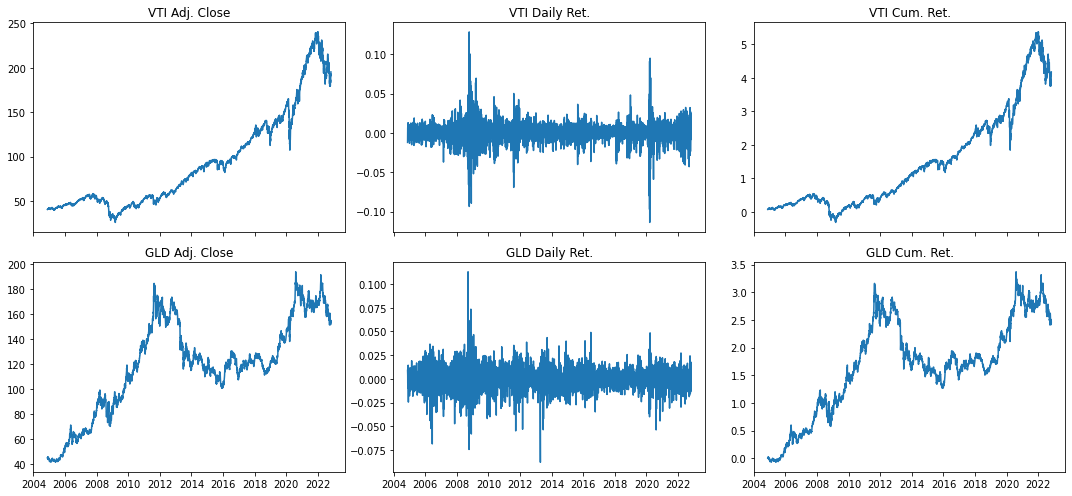

In [4]:
# Plotting the individual Prices, Returns and Cumulative Returns
figure, axis = plt.subplots(2,3, sharex='all', figsize=(15,7))

axis[0,0].plot(data_and_returns['VTI'])
axis[0,0].set_title('VTI Adj. Close')

axis[1,0].plot(data_and_returns['GLD'])
axis[1,0].set_title('GLD Adj. Close')

axis[0,1].plot(data_and_returns['VTI_Daily_Ret'])
axis[0,1].set_title('VTI Daily Ret.')

axis[1,1].plot(data_and_returns['GLD_Daily_Ret'])
axis[1,1].set_title('GLD Daily Ret.')

axis[0,2].plot(data_and_returns['VTI_Cum_Ret'])
axis[0,2].set_title('VTI Cum. Ret.')

axis[1,2].plot(data_and_returns['GLD_Cum_Ret'])
axis[1,2].set_title('GLD Cum. Ret.')

plt.tight_layout()
plt.show()

# Preparing the Strategy

**Dual Moving Average Crossover**

In [5]:
Data = data.dropna()
Data

,GLD,VTI
Date,,
2004-11-18,44.380001,41.046700
2004-11-19,44.779999,40.548492
2004-11-22,44.950001,40.815399
2004-11-23,44.750000,40.829613
2004-11-24,45.049999,41.064480
...,...,...
2022-10-24,153.649994,189.509995
2022-10-25,154.000000,192.940002
2022-10-26,154.979996,191.750000


In [6]:
Data['Price Ratio'] = Data['VTI']/Data['GLD']
Data

,GLD,VTI,Price Ratio
Date,,,
2004-11-18,44.380001,41.046700,0.924892
2004-11-19,44.779999,40.548492,0.905505
2004-11-22,44.950001,40.815399,0.908018
2004-11-23,44.750000,40.829613,0.912394
2004-11-24,45.049999,41.064480,0.911531
...,...,...,...
2022-10-24,153.649994,189.509995,1.233388
2022-10-25,154.000000,192.940002,1.252857
2022-10-26,154.979996,191.750000,1.237256


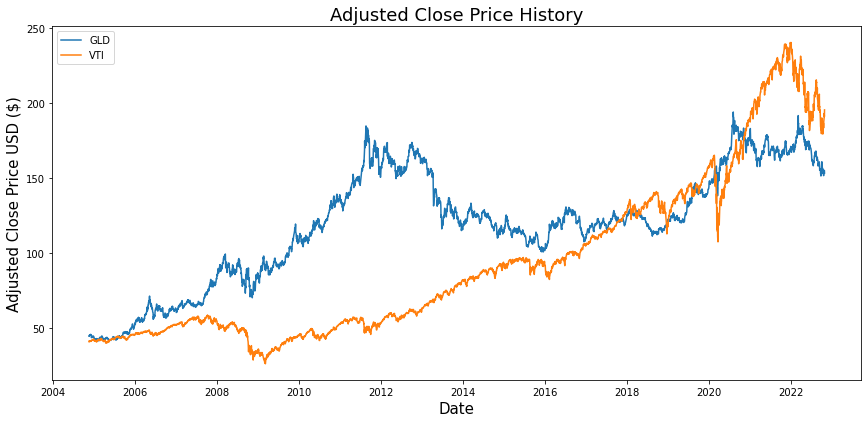

In [7]:
# Plotting
title = 'Adjusted Close Price History'
  
plt.figure(figsize=(14.5,6.5)) 
plt.plot(Data['GLD'],  label='GLD')
plt.plot(Data['VTI'],  label='VTI')
  
plt.title(title, fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Adjusted Close Price USD ($)', fontsize=15)
plt.legend(loc='upper left')
plt.show()

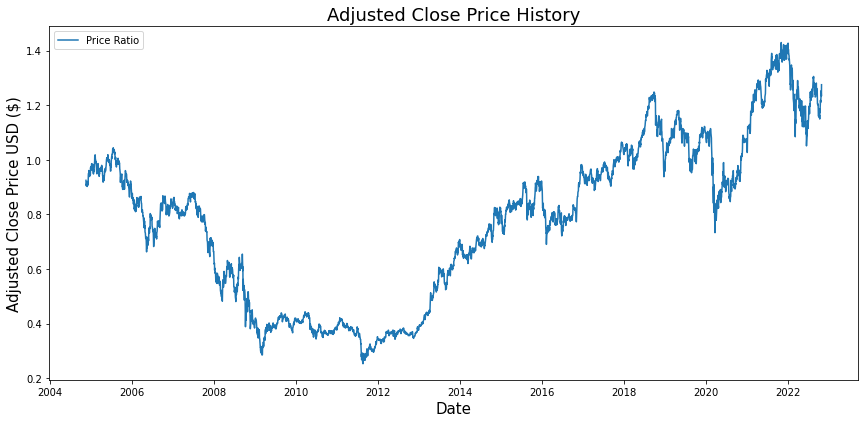

In [8]:
# Plotting
title = 'Adjusted Close Price History'
  
plt.figure(figsize=(14.5,6.5)) 
plt.plot(Data['Price Ratio'],  label='Price Ratio')
  
plt.title(title, fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Adjusted Close Price USD ($)', fontsize=15)
plt.legend(loc='upper left')
plt.show()

In [9]:
# Creating our Simple 30-Day Moving Average, used as a proxy for the short-term trend
SMA30 = Data['Price Ratio'].rolling(window=30).mean()
SMA30 = SMA30.to_frame()
SMA30

,Price Ratio
Date,
2004-11-18,NaN
2004-11-19,NaN
2004-11-22,NaN
2004-11-23,NaN
2004-11-24,NaN
...,...
2022-10-24,1.201626
2022-10-25,1.201982
2022-10-26,1.201496


In [10]:
# Creating our Simple 100-Day Moving Average, used as a proxy for the long-term trend
SMA100 = Data['Price Ratio'].rolling(window=100).mean()
SMA100 = SMA100.to_frame()
SMA100

,Price Ratio
Date,
2004-11-18,NaN
2004-11-19,NaN
2004-11-22,NaN
2004-11-23,NaN
2004-11-24,NaN
...,...
2022-10-24,1.205331
2022-10-25,1.205961
2022-10-26,1.206504


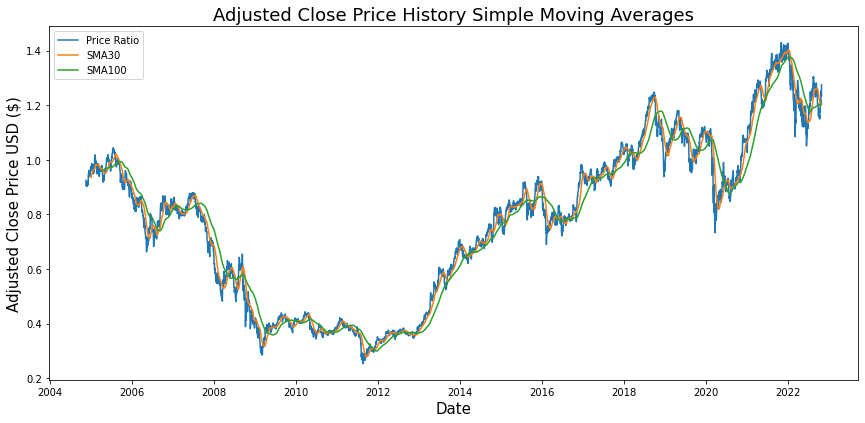

In [11]:
# Plotting
title = 'Adjusted Close Price History Simple Moving Averages'
  
plt.figure(figsize=(14.5,6.5)) 
plt.plot(Data['Price Ratio'],  label='Price Ratio')
plt.plot(SMA30['Price Ratio'],  label='SMA30')
plt.plot(SMA100['Price Ratio'],  label='SMA100')
  
plt.title(title, fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Adjusted Close Price USD ($)', fontsize=15)
plt.legend(loc='upper left')
plt.show()

In [12]:
# Creating my signal
signal = Data.copy()
signal['SMA30'] = SMA30
signal['SMA100'] = SMA100
signal['VTI Returns'] = signal['VTI'].pct_change()
signal['GLD Returns'] = signal['GLD'].pct_change()
signal

,GLD,VTI,Price Ratio,SMA30,SMA100,VTI Returns,GLD Returns
Date,,,,,,,
2004-11-18,44.380001,41.046700,0.924892,NaN,NaN,NaN,NaN
2004-11-19,44.779999,40.548492,0.905505,NaN,NaN,-0.012138,0.009013
2004-11-22,44.950001,40.815399,0.908018,NaN,NaN,0.006582,0.003796
2004-11-23,44.750000,40.829613,0.912394,NaN,NaN,0.000348,-0.004449
2004-11-24,45.049999,41.064480,0.911531,NaN,NaN,0.005752,0.006704
...,...,...,...,...,...,...,...
2022-10-24,153.649994,189.509995,1.233388,1.201626,1.205331,0.010774,-0.003244
2022-10-25,154.000000,192.940002,1.252857,1.201982,1.205961,0.018099,0.002278
2022-10-26,154.979996,191.750000,1.237256,1.201496,1.206504,-0.006168,0.006364


**Long Only**

In [13]:
def long_buy_sell(signal):
    signal['Trades'] = np.zeros(len(signal)) 
    signal['Long Returns'] = np.zeros(len(signal))
    flag = 0
    for i in range(0, len(signal) - 1):
        if signal['SMA30'][i] >= signal['SMA100'][i]:
            signal['Long Returns'][i+1] = signal['VTI Returns'][i+1] # +1 Because the first return we get is the one on the day following a trade
            if flag != 1:
                signal['Trades'][i] = 1 # The signal activates a trade
                flag = 1 # To understand if we're already long on the correct asset
            else:
                signal['Trades'][i] = signal['Trades'][i]
         
        elif signal['SMA30'][i] < signal['SMA100'][i]:
            signal['Long Returns'][i+1] = signal['GLD Returns'][i+1]
            if flag != -1:
                signal['Trades'][i] = 1
                flag = -1
            else:
                signal['Trades'][i] =  signal['Trades'][i+1]
  
    return (signal)

In [14]:
tc = 0.01 # Transaction Costs
def long_buy_sell_tc(signal):
    signal['Trades'] = np.zeros(len(signal)) 
    signal['Long Returns'] = np.zeros(len(signal))
    flag = 0
    for i in range(0, len(signal) - 1):
        if signal['SMA30'][i] >= signal['SMA100'][i]:
            signal['Long Returns'][i+1] = signal['VTI Returns'][i+1] # +1 Because the first return we get is the one on the day following a trade
            if flag != 1:
                signal['Trades'][i] = 1 # The signal activates a trade
                signal['Long Returns'][i+1] -= tc # Everytime a trade is activated, we must pay the transaction cost
                flag = 1 # To understand if we're already long on the right asset
            else:
                signal['Trades'][i] = signal['Trades'][i]
         
        elif signal['SMA30'][i] < signal['SMA100'][i]:
            signal['Long Returns'][i+1] = signal['GLD Returns'][i+1]
            if flag != -1:
                signal['Trades'][i] = 1
                signal['Long Returns'][i+1] -= tc
                flag = -1
            else:
                signal['Trades'][i] =  signal['Trades'][i+1]
  
    return (signal)

In [15]:
# Long only
long_signal = signal.copy()
long_signal = long_buy_sell(long_signal)

# Long only with transaction costs
long_signal_tc = signal.copy()
long_signal_tc = long_buy_sell_tc(long_signal_tc)

long_signal

,GLD,VTI,Price Ratio,SMA30,SMA100,VTI Returns,GLD Returns,Trades,Long Returns
Date,,,,,,,,,
2004-11-18,44.380001,41.046700,0.924892,NaN,NaN,NaN,NaN,0.0,0.000000
2004-11-19,44.779999,40.548492,0.905505,NaN,NaN,-0.012138,0.009013,0.0,0.000000
2004-11-22,44.950001,40.815399,0.908018,NaN,NaN,0.006582,0.003796,0.0,0.000000
2004-11-23,44.750000,40.829613,0.912394,NaN,NaN,0.000348,-0.004449,0.0,0.000000
2004-11-24,45.049999,41.064480,0.911531,NaN,NaN,0.005752,0.006704,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
2022-10-24,153.649994,189.509995,1.233388,1.201626,1.205331,0.010774,-0.003244,0.0,-0.003244
2022-10-25,154.000000,192.940002,1.252857,1.201982,1.205961,0.018099,0.002278,0.0,0.002278
2022-10-26,154.979996,191.750000,1.237256,1.201496,1.206504,-0.006168,0.006364,0.0,0.006364


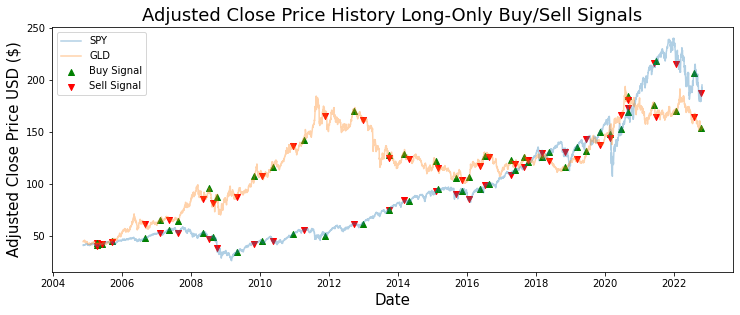

In [16]:
# Visually show the assets buy and sell signals
# Create the title 
title = 'Adjusted Close Price History Long-Only Buy/Sell Signals'
  
# Create and plot the graph
plt.figure(figsize=(12.2,4.5))

# Plotting    
plt.plot(long_signal['VTI'], alpha = 0.35)
plt.plot(long_signal['GLD'], alpha = 0.35)

# Visualizing the signals
for i in range(0, len(long_signal)):
    if long_signal['Trades'][i] == 1:
        if long_signal['Long Returns'][i+1] == long_signal['VTI Returns'][i+1]:
            plt.scatter(long_signal.index[i], long_signal['VTI'][i], color = 'green', marker = '^', alpha = 1)
            plt.scatter(long_signal.index[i], long_signal['GLD'][i], color = 'red', marker = 'v', alpha = 1)
        elif long_signal['Long Returns'][i+1] == long_signal['GLD Returns'][i+1]:
            plt.scatter(long_signal.index[i], long_signal['GLD'][i], color = 'green', marker = '^', alpha = 1)
            plt.scatter(long_signal.index[i], long_signal['VTI'][i], color = 'red', marker = 'v', alpha = 1)
        else:
            pass
    else:
        pass

plt.title(title, fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Adjusted Close Price USD ($)', fontsize=15)
plt.legend(['SPY', 'GLD', 'Buy Signal', 'Sell Signal'])

plt.show()

**Long-Short**

In [17]:
def long_short_buy_sell(signal):
    signal['Trades'] = np.zeros(len(signal))
    signal['Long Returns'] = np.zeros(len(signal))
    signal['Short Returns'] = np.zeros(len(signal))
    signal['Long-Short Returns'] = np.zeros(len(signal))
    flag = 0
    for i in range(0,len(signal) - 1):
        if signal['SMA30'][i] > signal['SMA100'][i]:
            signal['Long Returns'][i+1] = signal['VTI Returns'][i+1] # +1 because the first return we get is the following day one
            signal['Short Returns'][i+1] = - signal['GLD Returns'][i+1]
            if flag != 1:
                signal['Trades'][i] = 1  #The signal activates a trade
                flag = 1 # To understand if we're already long on the right asset
            else:
                signal['Trades'][i] = signal['Trades'][i]
         
        elif signal['SMA30'][i] < signal['SMA100'][i]:
            signal['Long Returns'][i+1] = signal['GLD Returns'][i+1] # +1 because the first return we get is the following day one
            signal['Short Returns'][i+1] = - signal['VTI Returns'][i+1]
            if flag != -1:
                signal['Trades'][i] = 1
                flag = -1
            else:
                signal['Trades'][i] =  signal['Trades'][i]
                
    signal['Long-Short Returns'] = signal['Long Returns'] + signal['Short Returns']
    return (signal)

In [18]:
def long_short_buy_sell_tc(signal):
    signal['Trades'] = np.zeros(len(signal))
    signal['Long Returns'] = np.zeros(len(signal))
    signal['Short Returns'] = np.zeros(len(signal))
    signal['Long-Short Returns'] = np.zeros(len(signal))
    flag = 0
    for i in range(0,len(signal) - 1):
        if signal['SMA30'][i] > signal['SMA100'][i]:
            signal['Long Returns'][i+1] = signal['VTI Returns'][i+1] # +1 because the first return we get is the following day one
            signal['Short Returns'][i+1] = - signal['GLD Returns'][i+1] # Negative sign because we are shorting 
            if flag != 1:
                signal['Trades'][i] = 1  # The signal activates a trade
                signal['Long Returns'][i+1] -= tc
                signal['Short Returns'][i+1] -= tc
                flag = 1 # To understand if we're already long on the right asset
            else:
                signal['Trades'][i] = signal['Trades'][i]
         
        elif signal['SMA30'][i] < signal['SMA100'][i]:
            signal['Long Returns'][i+1] = signal['GLD Returns'][i+1] # +1 because the first return we get is the following day one
            signal['Short Returns'][i+1] = - signal['VTI Returns'][i+1]
            if flag != -1:
                signal['Trades'][i] = 1
                signal['Long Returns'][i+1] -= tc
                signal['Short Returns'][i+1] -= tc
                flag = -1
            else:
                signal['Trades'][i] =  signal['Trades'][i]
                
    signal['Long-Short Returns'] = signal['Long Returns'] + signal['Short Returns']
    return (signal)

In [19]:
# Long-short
long_short_signal = signal.copy()
long_short_signal = long_short_buy_sell(long_short_signal)

# Long-short with transaction costs
long_short_signal_tc = signal.copy()
long_short_signal_tc = long_short_buy_sell_tc(long_short_signal_tc)

long_short_signal

,GLD,VTI,Price Ratio,SMA30,SMA100,VTI Returns,GLD Returns,Trades,Long Returns,Short Returns,Long-Short Returns
Date,,,,,,,,,,,
2004-11-18,44.380001,41.046700,0.924892,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000
2004-11-19,44.779999,40.548492,0.905505,NaN,NaN,-0.012138,0.009013,0.0,0.000000,0.000000,0.000000
2004-11-22,44.950001,40.815399,0.908018,NaN,NaN,0.006582,0.003796,0.0,0.000000,0.000000,0.000000
2004-11-23,44.750000,40.829613,0.912394,NaN,NaN,0.000348,-0.004449,0.0,0.000000,0.000000,0.000000
2004-11-24,45.049999,41.064480,0.911531,NaN,NaN,0.005752,0.006704,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,153.649994,189.509995,1.233388,1.201626,1.205331,0.010774,-0.003244,0.0,-0.003244,-0.010774,-0.014017
2022-10-25,154.000000,192.940002,1.252857,1.201982,1.205961,0.018099,0.002278,0.0,0.002278,-0.018099,-0.015821
2022-10-26,154.979996,191.750000,1.237256,1.201496,1.206504,-0.006168,0.006364,0.0,0.006364,0.006168,0.012531


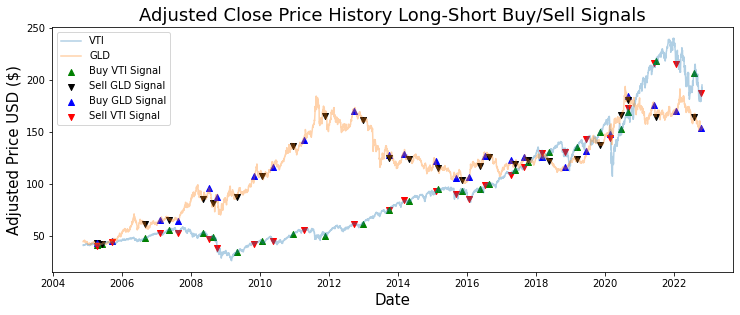

In [20]:
# Visually show the assets buy and sell signals
# Create the title 
title = 'Adjusted Close Price History Long-Short Buy/Sell Signals'
  
# Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5

# Plotting    
plt.plot(long_short_signal['VTI'], alpha = 0.35)
plt.plot(long_short_signal['GLD'], alpha = 0.35)

# Visualizing the signals
for i in range(0, len(long_short_signal)):
    if long_short_signal['Trades'][i] == 1:
        if long_short_signal['Long Returns'][i+1] == long_short_signal['VTI Returns'][i+1]:
            plt.scatter(long_short_signal.index[i], long_short_signal['VTI'][i], color = 'green', marker = '^', alpha = 1)
            plt.scatter(long_short_signal.index[i], long_short_signal['GLD'][i], color = 'black', marker = 'v', alpha = 1)
            
        elif long_short_signal['Long Returns'][i+1] == long_short_signal['GLD Returns'][i+1]:
            plt.scatter(long_short_signal.index[i], long_short_signal['GLD'][i], color = 'blue', marker = '^', alpha = 1)
            plt.scatter(long_short_signal.index[i], long_short_signal['VTI'][i], color = 'red', marker = 'v', alpha = 1)
        else:
            pass
    else:
        pass

plt.title(title, fontsize=18)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Price USD ($)',fontsize=15)
plt.legend(['VTI', 'GLD', 'Buy VTI Signal', 'Sell GLD Signal', 'Buy GLD Signal', 'Sell VTI Signal'])

plt.show()

# Performance Analysis

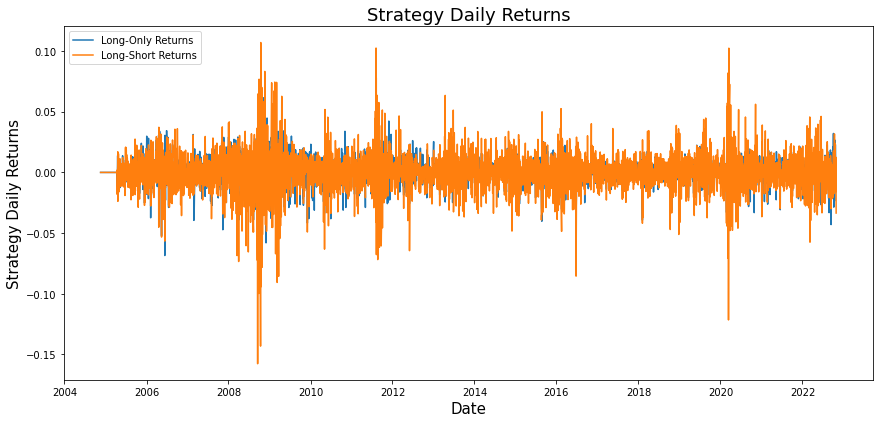

In [21]:
# Plotting
title = 'Strategy Daily Returns'
  
plt.figure(figsize=(14.5,6.5)) 
plt.plot(long_signal['Long Returns'],  label='Long-Only Returns')
plt.plot(long_short_signal['Long-Short Returns'],  label='Long-Short Returns')

plt.title(title, fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Strategy Daily Returns', fontsize=15)
plt.legend(loc='upper left')
plt.show()

In [22]:
# Number of trades done
long_signal['Trades'].sum()

52.0

In [23]:
long_short_signal['Trades'].sum()

52.0

In [24]:
# Merging strategies returns
strategy_returns = long_signal['Long Returns'][100:].to_frame() # the first day we earn returns is the 101st day
strategy_returns = strategy_returns.merge(long_short_signal['Long-Short Returns'][100:], how='inner', on='Date')

strategy_returns_tc = long_signal_tc['Long Returns'][100:].to_frame()
strategy_returns_tc = strategy_returns_tc.merge(long_short_signal_tc['Long-Short Returns'][100:], how='inner', on='Date')

strategy_returns

,Long Returns,Long-Short Returns
Date,,
2005-04-14,-0.011816,0.001937
2005-04-15,-0.015943,-0.018070
2005-04-18,0.003600,-0.003239
2005-04-19,0.013821,0.005390
2005-04-20,0.002773,0.017003
...,...,...
2022-10-24,-0.003244,-0.014017
2022-10-25,0.002278,-0.015821
2022-10-26,0.006364,0.012531



**Getting Risk-Free Rate from Fama French Factors**

In [25]:
# Getting the Fama French Factors
url = "https://raw.githubusercontent.com/ELMAMBA/Analysis-of-Quantitative-Investment-Strategies/main/Francisco/FamaFrenchFactors.CSV"
download = requests.get(url).content
FamaFrenchData = pd.read_csv(io.StringIO(download.decode('utf-8')), header = 2, index_col = 0)
FamaFrenchData['Date'] = pd.to_datetime(FamaFrenchData.index, format='%Y%m%d')
FamaFrenchData.set_index(['Date'], inplace=True)
FamaFrenchData

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-01,-0.67,0.02,-0.35,0.03,0.13,0.012
1963-07-02,0.79,-0.28,0.28,-0.08,-0.21,0.012
1963-07-03,0.63,-0.18,-0.10,0.13,-0.25,0.012
1963-07-05,0.40,0.09,-0.28,0.07,-0.30,0.012
1963-07-08,-0.63,0.07,-0.20,-0.27,0.06,0.012
...,...,...,...,...,...,...
2022-10-25,1.78,1.02,-1.52,-1.16,-1.23,0.011
2022-10-26,-0.66,0.69,0.89,-0.81,0.69,0.011
2022-10-27,-0.54,0.43,1.06,-0.38,0.51,0.011


In [26]:
# Getting the risk-free rate
FamaFrench_RF = FamaFrenchData['RF'].to_frame()
FamaFrench_RF['Date'] = pd.to_datetime(FamaFrenchData.index, format='%Y%m%d')
FamaFrench_RF.set_index(['Date'],inplace=True)
FamaFrench_RF /= 100
FamaFrench_RF

,RF
Date,
1963-07-01,0.00012
1963-07-02,0.00012
1963-07-03,0.00012
1963-07-05,0.00012
1963-07-08,0.00012
...,...
2022-10-25,0.00011
2022-10-26,0.00011
2022-10-27,0.00011


In [27]:
# Converting returns to excess returns
strategy = strategy_returns.merge(FamaFrench_RF, how='inner', on='Date')
strategy['Long Excess Returns'] = strategy['Long Returns'] - strategy['RF']
strategy['Long-Short Excess Returns'] = strategy['Long-Short Returns'] - strategy['RF']

strategy_tc = strategy_returns_tc.merge(FamaFrench_RF, how='inner', on='Date')
strategy_tc['Long Excess Returns'] = strategy_tc['Long Returns'] - strategy_tc['RF']
strategy_tc['Long-Short Excess Returns'] = strategy_tc['Long-Short Returns'] - strategy_tc['RF']

strategy

,Long Returns,Long-Short Returns,RF,Long Excess Returns,Long-Short Excess Returns
Date,,,,,
2005-04-14,-0.011816,0.001937,0.00010,-0.011916,0.001837
2005-04-15,-0.015943,-0.018070,0.00010,-0.016043,-0.018170
2005-04-18,0.003600,-0.003239,0.00010,0.003500,-0.003339
2005-04-19,0.013821,0.005390,0.00010,0.013721,0.005290
2005-04-20,0.002773,0.017003,0.00010,0.002673,0.016903
...,...,...,...,...,...
2022-10-24,-0.003244,-0.014017,0.00011,-0.003354,-0.014127
2022-10-25,0.002278,-0.015821,0.00011,0.002168,-0.015931
2022-10-26,0.006364,0.012531,0.00011,0.006254,0.012421


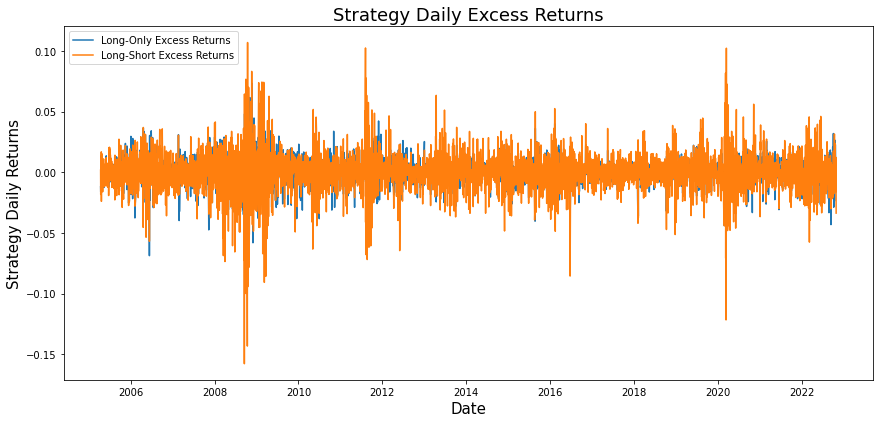

In [28]:
# Plotting
title = 'Strategy Daily Excess Returns'
  
plt.figure(figsize=(14.5,6.5)) 
plt.plot(strategy['Long Excess Returns'],  label='Long-Only Excess Returns')
plt.plot(strategy['Long-Short Excess Returns'],  label='Long-Short Excess Returns')

plt.title(title, fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Strategy Daily Returns', fontsize=15)
plt.legend(loc='upper left')
plt.show()

In [29]:
# Calculating cumulative returns
strategy['Long Cumulative Excess Returns'] = (strategy['Long Excess Returns']+1).cumprod()-1
strategy['Long-Short Cumulative Excess Returns'] = (strategy['Long-Short Excess Returns']+1).cumprod()-1

strategy_tc['Long Cumulative Excess Returns'] = (strategy_tc['Long Excess Returns']+1).cumprod()-1
strategy_tc['Long-Short Cumulative Excess Returns'] = (strategy_tc['Long-Short Excess Returns']+1).cumprod()-1

strategy

,Long Returns,Long-Short Returns,RF,Long Excess Returns,Long-Short Excess Returns,Long Cumulative Excess Returns,Long-Short Cumulative Excess Returns
Date,,,,,,,
2005-04-14,-0.011816,0.001937,0.00010,-0.011916,0.001837,-0.011916,0.001837
2005-04-15,-0.015943,-0.018070,0.00010,-0.016043,-0.018170,-0.027768,-0.016367
2005-04-18,0.003600,-0.003239,0.00010,0.003500,-0.003339,-0.024365,-0.019651
2005-04-19,0.013821,0.005390,0.00010,0.013721,0.005290,-0.010979,-0.014466
2005-04-20,0.002773,0.017003,0.00010,0.002673,0.016903,-0.008335,0.002193
...,...,...,...,...,...,...,...
2022-10-24,-0.003244,-0.014017,0.00011,-0.003354,-0.014127,2.978708,-0.420784
2022-10-25,0.002278,-0.015821,0.00011,0.002168,-0.015931,2.987334,-0.430012
2022-10-26,0.006364,0.012531,0.00011,0.006254,0.012421,3.012269,-0.422932


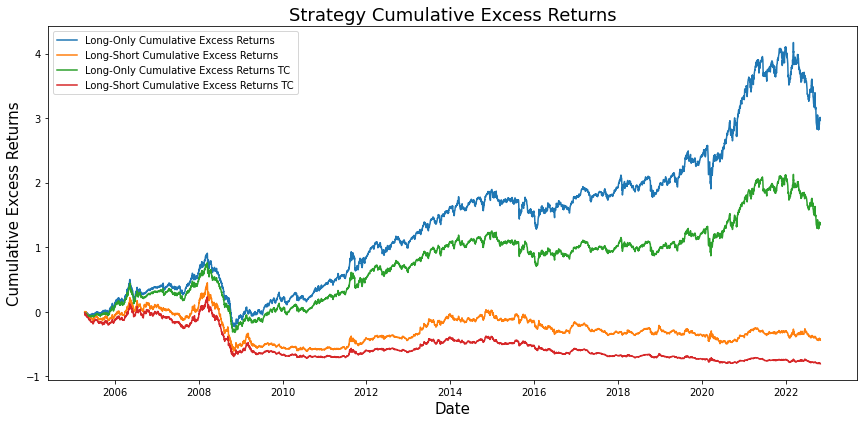

In [30]:
# Plotting
title = 'Strategy Cumulative Excess Returns'
  
plt.figure(figsize=(14.5,6.5)) 
plt.plot(strategy['Long Cumulative Excess Returns'],  label='Long-Only Cumulative Excess Returns')
plt.plot(strategy['Long-Short Cumulative Excess Returns'],  label='Long-Short Cumulative Excess Returns')
plt.plot(strategy_tc['Long Cumulative Excess Returns'],  label='Long-Only Cumulative Excess Returns TC')
plt.plot(strategy_tc['Long-Short Cumulative Excess Returns'],  label='Long-Short Cumulative Excess Returns TC')

plt.title(title, fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cumulative Excess Returns', fontsize=15)
plt.legend(loc='upper left')
plt.show()

In [31]:
# Calculating Sharpe Ratio
long_sharpe = strategy['Long Excess Returns'].mean() / strategy['Long Excess Returns'].std()
long_short_sharpe = strategy['Long-Short Excess Returns'].mean() / strategy['Long-Short Excess Returns'].std()
long_sharpe, long_short_sharpe

(0.03402334933664721, 0.00024094537065803197)

In [32]:
strategy['Long Excess Returns'].mean(), strategy['Long-Short Excess Returns'].mean()

(0.00037165969687136377, 3.9525859596284515e-06)

In [33]:
strategy['Long Excess Returns'].std(), strategy['Long-Short Excess Returns'].std()

(0.010923665780048348, 0.01640449014991976)

In [34]:
# Defining useful function
def annualizeReturn(ret):
    return 252*ret.mean() 

def annualizeStdev(ret):
    return (252**0.5)*ret.std()

def annualizeSharpe(sharpe):
    return (252**0.5)*sharpe

In [35]:
# Annualizing
annualized_long_return = annualizeReturn(strategy['Long Excess Returns'])
annualized_long_short_return = annualizeReturn(strategy['Long-Short Excess Returns'])

annualized_long_stdev = annualizeStdev(strategy['Long Excess Returns']) 
annualized_long_short_stdev = annualizeStdev(strategy['Long-Short Excess Returns'])

annualized_long_sharpe = annualizeSharpe(long_sharpe)
annualized_long_short_sharpe = annualizeSharpe(long_short_sharpe)

# Creating the data
data = [['Long', annualized_long_return, annualized_long_stdev, annualized_long_sharpe], 
        ['Long-Short', annualized_long_short_return, annualized_long_short_stdev, annualized_long_short_sharpe]]
  
# Defining header names
col_names = ['Ann. Excess Return', 'Ann. Stdev', 'Ann. Sharpe Ratio']
  
# Displaying table
print(tabulate(data, headers=col_names))

              Ann. Excess Return    Ann. Stdev    Ann. Sharpe Ratio
----------  --------------------  ------------  -------------------
Long                 0.0936582        0.173408           0.540104
Long-Short           0.000996052      0.260413           0.00382489


**Compare to the Market Portfolio**

In [36]:
# Getting market data
FamaFrench_Mkt_RF = FamaFrenchData['Mkt-RF'].to_frame()
FamaFrench_Mkt_RF['Date'] = pd.to_datetime(FamaFrenchData.index, format='%Y%m%d')
FamaFrench_Mkt_RF.set_index(['Date'],inplace=True)
FamaFrench_Mkt_RF /= 100
FamaFrench_Mkt_RF

,Mkt-RF
Date,
1963-07-01,-0.0067
1963-07-02,0.0079
1963-07-03,0.0063
1963-07-05,0.0040
1963-07-08,-0.0063
...,...
2022-10-25,0.0178
2022-10-26,-0.0066
2022-10-27,-0.0054


In [37]:
# Creating a comparison dataframe
comparison = strategy.merge(FamaFrench_Mkt_RF, how='inner', on='Date')
comparison['Mkt-RF Cumulative Returns'] = (comparison['Mkt-RF']+1).cumprod() - 1
comparison = comparison[['Long Excess Returns', 'Long-Short Excess Returns', 'Long Cumulative Excess Returns', 'Long-Short Cumulative Excess Returns', 'Mkt-RF', 'Mkt-RF Cumulative Returns']]
comparison

,Long Excess Returns,Long-Short Excess Returns,Long Cumulative Excess Returns,Long-Short Cumulative Excess Returns,Mkt-RF,Mkt-RF Cumulative Returns
Date,,,,,,
2005-04-14,-0.011916,0.001837,-0.011916,0.001837,-0.0110,-0.011000
2005-04-15,-0.016043,-0.018170,-0.027768,-0.016367,-0.0159,-0.026725
2005-04-18,0.003500,-0.003339,-0.024365,-0.019651,0.0029,-0.023903
2005-04-19,0.013721,0.005290,-0.010979,-0.014466,0.0075,-0.016582
2005-04-20,0.002673,0.016903,-0.008335,0.002193,-0.0135,-0.029858
...,...,...,...,...,...,...
2022-10-24,-0.003354,-0.014127,2.978708,-0.420784,0.0103,2.860209
2022-10-25,0.002168,-0.015931,2.987334,-0.430012,0.0178,2.928921
2022-10-26,0.006254,0.012421,3.012269,-0.422932,-0.0066,2.902990


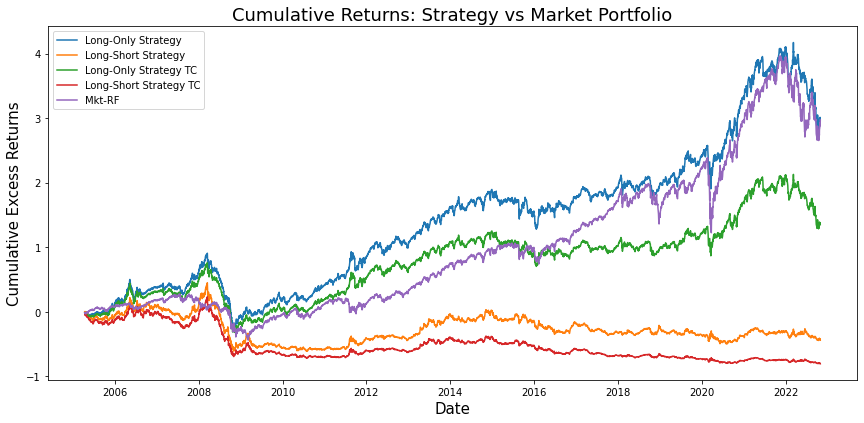

In [38]:
# Plotting
title = 'Cumulative Returns: Strategy vs Market Portfolio'
  
plt.figure(figsize=(14.5,6.5)) 
plt.plot(comparison['Long Cumulative Excess Returns'],  label='Long-Only Strategy')
plt.plot(comparison['Long-Short Cumulative Excess Returns'],  label='Long-Short Strategy')
plt.plot(strategy_tc['Long Cumulative Excess Returns'],  label='Long-Only Strategy TC')
plt.plot(strategy_tc['Long-Short Cumulative Excess Returns'],  label='Long-Short Strategy TC')
plt.plot(comparison['Mkt-RF Cumulative Returns'],  label='Mkt-RF')
  
plt.title(title, fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cumulative Excess Returns', fontsize=15)
plt.legend(loc='upper left')
plt.show()

In [39]:
# Computing market performance statistics
mkt_rf_sharpe = comparison['Mkt-RF'].mean() / comparison['Mkt-RF'].std()

annualized_mkt_rf_return = annualizeReturn(comparison['Mkt-RF'])
annualized_mkt_rf_stdev = annualizeStdev(comparison['Mkt-RF'])
annualized_mkt_rf_sharpe = annualizeSharpe(mkt_rf_sharpe)

# Creating the data
data = [['Long', annualized_long_return, annualized_long_stdev, annualized_long_sharpe], 
        ['Long-Short', annualized_long_short_return, annualized_long_short_stdev, annualized_long_short_sharpe],
        ['Mkt-Rf', annualized_mkt_rf_return, annualized_mkt_rf_stdev, annualized_mkt_rf_sharpe]]
  
# Defining header names
col_names = ['Ann. Excess Return', 'Ann. Stdev', 'Ann. Sharpe Ratio']
  
print(tabulate(data, headers=col_names))

              Ann. Excess Return    Ann. Stdev    Ann. Sharpe Ratio
----------  --------------------  ------------  -------------------
Long                 0.0936582        0.173408           0.540104
Long-Short           0.000996052      0.260413           0.00382489
Mkt-Rf               0.0988207        0.200317           0.493322


# Volatility Targeting

Targetting 10% over the full sample

In [40]:
comparison['Mkt-RF'].std()

0.012618767870575035

In [41]:
annualized_mktrf_stdev = annualizeStdev(comparison['Mkt-RF'])
annualized_mktrf_stdev

0.20031672982556178

In [42]:
# Leveraging to achieve the target 
target = 0.1
long_leverage = target/annualized_long_stdev
long_short_leverage = target/annualized_long_short_stdev
Mkt_RF_leverage = target/annualized_mktrf_stdev

leveraged_comparison = comparison[['Long Excess Returns','Long-Short Excess Returns','Mkt-RF']]
leveraged_comparison['Vol. Target Long Returns'] = leveraged_comparison['Long Excess Returns']*long_leverage
leveraged_comparison['Vol. Target Long-Short Returns'] = leveraged_comparison['Long-Short Excess Returns']*long_short_leverage
leveraged_comparison['Vol. Target Mkt-RF Returns'] = leveraged_comparison['Mkt-RF']*Mkt_RF_leverage
leveraged_comparison

,Long Excess Returns,Long-Short Excess Returns,Mkt-RF,Vol. Target Long Returns,Vol. Target Long-Short Returns,Vol. Target Mkt-RF Returns
Date,,,,,,
2005-04-14,-0.011916,0.001837,-0.0110,-0.006872,0.000705,-0.005491
2005-04-15,-0.016043,-0.018170,-0.0159,-0.009252,-0.006978,-0.007937
2005-04-18,0.003500,-0.003339,0.0029,0.002019,-0.001282,0.001448
2005-04-19,0.013721,0.005290,0.0075,0.007912,0.002031,0.003744
2005-04-20,0.002673,0.016903,-0.0135,0.001541,0.006491,-0.006739
...,...,...,...,...,...,...
2022-10-24,-0.003354,-0.014127,0.0103,-0.001934,-0.005425,0.005142
2022-10-25,0.002168,-0.015931,0.0178,0.001250,-0.006118,0.008886
2022-10-26,0.006254,0.012421,-0.0066,0.003606,0.004770,-0.003295


In [43]:
leveraged_comparison['Vol. Target Long Returns'].mean(), leveraged_comparison['Vol. Target Long-Short Returns'].mean()

(0.00021432695503391172, 1.5178131674129164e-06)

In [44]:
leveraged_comparison['Vol. Target Long Returns'].std(), leveraged_comparison['Vol. Target Long-Short Returns'].std()

(0.006299407883487122, 0.006299407883487124)

In [45]:
# Calculating cumulative returns with the volatility target
leveraged_comparison['Cumulative Vol. Target Long Excess Returns'] = (leveraged_comparison['Vol. Target Long Returns']+1).cumprod()-1
leveraged_comparison['Cumulative Vol. Target Long-Short Excess Returns'] = (leveraged_comparison['Vol. Target Long-Short Returns']+1).cumprod()-1
leveraged_comparison['Cumulative Vol. Target Mkt-RF Excess Returns'] = (leveraged_comparison['Vol. Target Mkt-RF Returns']+1).cumprod()-1

leveraged_comparison

,Long Excess Returns,Long-Short Excess Returns,Mkt-RF,Vol. Target Long Returns,Vol. Target Long-Short Returns,Vol. Target Mkt-RF Returns,Cumulative Vol. Target Long Excess Returns,Cumulative Vol. Target Long-Short Excess Returns,Cumulative Vol. Target Mkt-RF Excess Returns
Date,,,,,,,,,
2005-04-14,-0.011916,0.001837,-0.0110,-0.006872,0.000705,-0.005491,-0.006872,0.000705,-0.005491
2005-04-15,-0.016043,-0.018170,-0.0159,-0.009252,-0.006978,-0.007937,-0.016060,-0.006277,-0.013385
2005-04-18,0.003500,-0.003339,0.0029,0.002019,-0.001282,0.001448,-0.014074,-0.007551,-0.011957
2005-04-19,0.013721,0.005290,0.0075,0.007912,0.002031,0.003744,-0.006273,-0.005535,-0.008258
2005-04-20,0.002673,0.016903,-0.0135,0.001541,0.006491,-0.006739,-0.004741,0.000920,-0.014941
...,...,...,...,...,...,...,...,...,...
2022-10-24,-0.003354,-0.014127,0.0103,-0.001934,-0.005425,0.005142,1.365721,-0.065679,1.143906
2022-10-25,0.002168,-0.015931,0.0178,0.001250,-0.006118,0.008886,1.368679,-0.071395,1.162956
2022-10-26,0.006254,0.012421,-0.0066,0.003606,0.004770,-0.003295,1.377221,-0.066966,1.155830


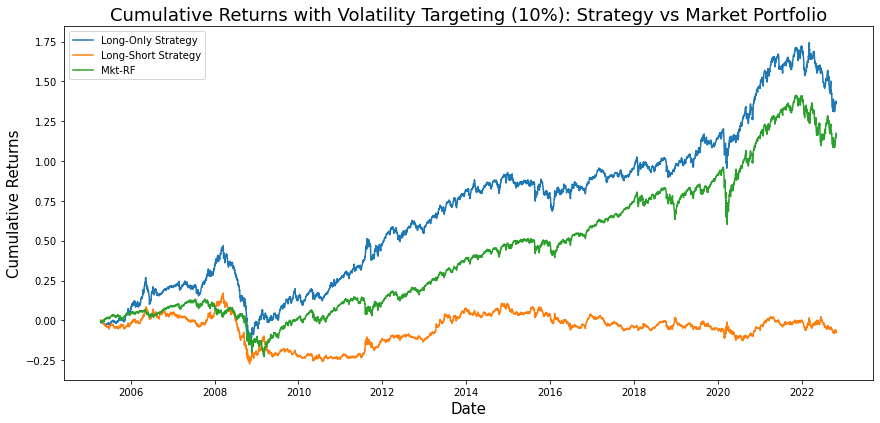

In [46]:
# Plotting
title = 'Cumulative Returns with Volatility Targeting (10%): Strategy vs Market Portfolio'
  
plt.figure(figsize=(14.5,6.5)) 
plt.plot(leveraged_comparison['Cumulative Vol. Target Long Excess Returns'],  label='Long-Only Strategy')
plt.plot(leveraged_comparison['Cumulative Vol. Target Long-Short Excess Returns'],  label='Long-Short Strategy')
plt.plot(leveraged_comparison['Cumulative Vol. Target Mkt-RF Excess Returns'],  label='Mkt-RF')
  
plt.title(title, fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cumulative Returns', fontsize=15)
plt.legend(loc='upper left')
plt.show()

In [47]:
# Annualizing data and computing missing performance statistics

annualized_long_leverage_return = annualizeReturn(leveraged_comparison['Vol. Target Long Returns'])
annualized_long_short_leverage_return = annualizeReturn(leveraged_comparison['Vol. Target Long-Short Returns'])
annualized_mkt_rf_leverage_return = annualizeReturn(leveraged_comparison['Vol. Target Mkt-RF Returns'])

annualized_long_leverage_stdev = annualizeStdev(leveraged_comparison['Vol. Target Long Returns']) 
annualized_long_short_leverage_stdev = annualizeStdev(leveraged_comparison['Vol. Target Long-Short Returns'])
annualized_mkt_rf_leverage_stdev = annualizeStdev(leveraged_comparison['Vol. Target Mkt-RF Returns'])

long_leverage_sharpe = leveraged_comparison['Vol. Target Long Returns'].mean() / leveraged_comparison['Vol. Target Long Returns'].std()
long_short_leverage_sharpe = leveraged_comparison['Vol. Target Long-Short Returns'].mean() / leveraged_comparison['Vol. Target Long-Short Returns'].std()
mkt_rf_leverage_sharpe = leveraged_comparison['Vol. Target Mkt-RF Returns'].mean() / leveraged_comparison['Vol. Target Mkt-RF Returns'].std()

annualized_long_leverage_sharpe = annualizeSharpe(long_leverage_sharpe)
annualized_long_short_leverage_sharpe = annualizeSharpe(long_short_leverage_sharpe)
annualized_mkt_rf_leverage_sharpe = annualizeSharpe(mkt_rf_leverage_sharpe)

# Creating data
data = [['Long', annualized_long_leverage_return, annualized_long_leverage_stdev, annualized_long_leverage_sharpe], 
        ['Long-Short', annualized_long_short_leverage_return, annualized_long_short_leverage_stdev, annualized_long_short_leverage_sharpe],
        ['Mkt-Rf', annualized_mkt_rf_leverage_return, annualized_mkt_rf_leverage_stdev, annualized_mkt_rf_leverage_sharpe]]
  
# Defining header names
col_names = ['Ann. Excess Return', 'Ann. Stdev', 'Ann. Sharpe Ratio']

print(tabulate(data, headers=col_names))

              Ann. Excess Return    Ann. Stdev    Ann. Sharpe Ratio
----------  --------------------  ------------  -------------------
Long                 0.0540104             0.1           0.540104
Long-Short           0.000382489           0.1           0.00382489
Mkt-Rf               0.0493322             0.1           0.493322


In [48]:
# Calculating performance statistics for the both halves of the sample, as well as Crisis Periods
full_sample = strategy[['Long Excess Returns', 'Long Cumulative Excess Returns'].copy()]
long_max_return = full_sample['Long Excess Returns'].max()
long_min_return = full_sample['Long Excess Returns'].min()
long_kurtosis = (strategy['Long Excess Returns']).kurt()
long_short_kurtosis = (strategy['Long-Short Excess Returns']).kurt()
long_skewness = (strategy['Long Excess Returns']).skew()
long_short_skewness = (strategy['Long-Short Excess Returns']).skew()

first_half = full_sample[full_sample.index.year < 2015]
first_half_long_max_return = first_half['Long Excess Returns'].max()
first_half_long_min_return = first_half['Long Excess Returns'].min()
first_half_long_kurtosis = first_half['Long Excess Returns'].kurt()
first_half_long_skewness = first_half['Long Excess Returns'].skew()
annualized_first_half_long_return = annualizeReturn(first_half['Long Excess Returns'])
annualized_first_half_long_stdev = annualizeStdev(first_half['Long Excess Returns'])
annualized_first_half_long_sharpe = annualized_first_half_long_return/annualized_first_half_long_stdev

second_half = full_sample[full_sample.index.year >= 2015]
second_half_long_max_return = second_half['Long Excess Returns'].max()
second_half_long_min_return = second_half['Long Excess Returns'].min()
second_half_long_kurtosis = second_half['Long Excess Returns'].kurt()
second_half_long_skewness = second_half['Long Excess Returns'].skew()
annualized_second_half_long_return = annualizeReturn(second_half['Long Excess Returns'])
annualized_second_half_long_stdev = annualizeStdev(second_half['Long Excess Returns'])
annualized_second_half_long_sharpe = annualized_second_half_long_return/annualized_second_half_long_stdev

great_financial_crisis = full_sample[full_sample.index.year <= 2009]
great_financial_crisis_long_max_return = great_financial_crisis['Long Excess Returns'].max()
great_financial_crisis_long_min_return = great_financial_crisis['Long Excess Returns'].min()
great_financial_crisis_long_kurtosis = great_financial_crisis['Long Excess Returns'].kurt()
great_financial_crisis_long_skewness = great_financial_crisis['Long Excess Returns'].skew()
annualized_great_financial_crisis_long_return = annualizeReturn(great_financial_crisis['Long Excess Returns'])
annualized_great_financial_crisis_long_stdev = annualizeStdev(great_financial_crisis['Long Excess Returns'])
annualized_great_financial_crisis_long_sharpe = annualized_great_financial_crisis_long_return/annualized_great_financial_crisis_long_stdev

covid_crash_crisis = full_sample[full_sample.index.year == 2020]
covid_crash_long_max_return = covid_crash_crisis['Long Excess Returns'].max()
covid_crash_long_min_return = covid_crash_crisis['Long Excess Returns'].min()
covid_crash_long_kurtosis = covid_crash_crisis['Long Excess Returns'].kurt()
covid_crash_long_skewness = covid_crash_crisis['Long Excess Returns'].skew()
annualized_covid_crash_long_return = annualizeReturn(covid_crash_crisis['Long Excess Returns'])
annualized_covid_crash_long_stdev = annualizeStdev(covid_crash_crisis['Long Excess Returns'])
annualized_covid_crash_long_sharpe = annualized_covid_crash_long_return/annualized_covid_crash_long_stdev

#create data
data = [['2005-2022', long_max_return, long_min_return, annualized_long_return, annualized_long_stdev, long_kurtosis, long_skewness, annualized_long_sharpe], 
        ['2005-2014', first_half_long_max_return, first_half_long_min_return, annualized_first_half_long_return, annualized_first_half_long_stdev, first_half_long_kurtosis, first_half_long_skewness, annualized_first_half_long_sharpe],
        ['2015-2022', second_half_long_max_return, second_half_long_min_return, annualized_second_half_long_return, annualized_second_half_long_stdev, second_half_long_kurtosis, second_half_long_skewness, annualized_second_half_long_sharpe],
        ['Great Financial Crisis (2007-2009)', great_financial_crisis_long_max_return, great_financial_crisis_long_min_return, annualized_great_financial_crisis_long_return, annualized_great_financial_crisis_long_stdev, great_financial_crisis_long_kurtosis, great_financial_crisis_long_skewness, annualized_great_financial_crisis_long_sharpe],
        ['Covid Crash Crisis (2020)', covid_crash_long_max_return, covid_crash_long_min_return, annualized_covid_crash_long_return, annualized_covid_crash_long_stdev, covid_crash_long_kurtosis, covid_crash_long_skewness, annualized_covid_crash_long_sharpe]]
  
#define header names
col_names = ['Max','Min','Ann. Excess Return', 'Ann. Stdev', 'Kurtosis','Skewness','Ann. Sharpe Ratio']
  
#display table
print(tabulate(data, headers=col_names))

                                          Max         Min    Ann. Excess Return    Ann. Stdev    Kurtosis    Skewness    Ann. Sharpe Ratio
----------------------------------  ---------  ----------  --------------------  ------------  ----------  ----------  -------------------
2005-2022                           0.0735094  -0.0743448             0.0936582      0.173408     4.19137   -0.47678              0.540104
2005-2014                           0.0735094  -0.0743448             0.126337       0.191342     4.17268   -0.526662             0.660272
2015-2022                           0.0484704  -0.043873              0.053087       0.148162     2.56161   -0.340702             0.358304
Great Financial Crisis (2007-2009)  0.0735094  -0.0743448             0.0594274      0.226053     3.3041    -0.53255              0.262891
Covid Crash Crisis (2020)           0.0484704  -0.043873              0.26256        0.196288     2.10521   -0.351029             1.33763


# Regression Analysis: CAPM, FF3, FF5

In [49]:
strategy_excess_returns = strategy[['Long Excess Returns', 'Long-Short Excess Returns']]
strategy_excess_returns

,Long Excess Returns,Long-Short Excess Returns
Date,,
2005-04-14,-0.011916,0.001837
2005-04-15,-0.016043,-0.018170
2005-04-18,0.003500,-0.003339
2005-04-19,0.013721,0.005290
2005-04-20,0.002673,0.016903
...,...,...
2022-10-24,-0.003354,-0.014127
2022-10-25,0.002168,-0.015931
2022-10-26,0.006254,0.012421


In [50]:
strategy_regr = strategy_excess_returns.merge(FamaFrenchData, how='inner', on='Date')
strategy_regr

,Long Excess Returns,Long-Short Excess Returns,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,,
2005-04-14,-0.011916,0.001837,-1.10,-0.62,-0.15,0.19,-0.23,0.010
2005-04-15,-0.016043,-0.018170,-1.59,-0.26,-0.35,-0.14,-0.40,0.010
2005-04-18,0.003500,-0.003339,0.29,0.40,0.17,0.34,-0.31,0.010
2005-04-19,0.013721,0.005290,0.75,0.84,0.11,-0.47,0.09,0.010
2005-04-20,0.002673,0.016903,-1.35,-0.28,0.08,-0.36,0.12,0.010
...,...,...,...,...,...,...,...,...
2022-10-24,-0.003354,-0.014127,1.03,-0.63,0.45,1.17,0.48,0.011
2022-10-25,0.002168,-0.015931,1.78,1.02,-1.52,-1.16,-1.23,0.011
2022-10-26,0.006254,0.012421,-0.66,0.69,0.89,-0.81,0.69,0.011


In [51]:
strategy_regr[['Long Excess Returns','Mkt-RF','SMB','HML','RMW','CMA']].corr()

,Long Excess Returns,Mkt-RF,SMB,HML,RMW,CMA
Long Excess Returns,1.000000,0.418834,0.095523,0.024511,-0.123285,-0.075581
Mkt-RF,0.418834,1.000000,0.241762,0.201177,-0.270260,-0.192351
SMB,0.095523,0.241762,1.000000,0.195083,-0.250688,0.007920
HML,0.024511,0.201177,0.195083,1.000000,0.007411,0.451135
RMW,-0.123285,-0.270260,-0.250688,0.007411,1.000000,0.181383
CMA,-0.075581,-0.192351,0.007920,0.451135,0.181383,1.000000


In [52]:
strategy_regr[['Long-Short Excess Returns','Mkt-RF','SMB','HML','RMW','CMA']].corr()

,Long-Short Excess Returns,Mkt-RF,SMB,HML,RMW,CMA
Long-Short Excess Returns,1.000000,-0.235208,-0.065927,-0.077892,0.026721,0.042555
Mkt-RF,-0.235208,1.000000,0.241762,0.201177,-0.270260,-0.192351
SMB,-0.065927,0.241762,1.000000,0.195083,-0.250688,0.007920
HML,-0.077892,0.201177,0.195083,1.000000,0.007411,0.451135
RMW,0.026721,-0.270260,-0.250688,0.007411,1.000000,0.181383
CMA,0.042555,-0.192351,0.007920,0.451135,0.181383,1.000000


In [53]:
def information_ratio(alpha, residuals):
    annual_alpha = alpha*252
    annual_stdev = annualizeStdev(residuals)
    return annual_alpha / annual_stdev

**CAPM**

In [54]:
x = strategy_regr['Mkt-RF']
y = strategy_regr['Long Excess Returns']
x = sm.add_constant(x)
long_capm_model = sm.OLS(y,x)
long_capm_result = long_capm_model.fit()
print(long_capm_result.summary())

                             OLS Regression Results                            
Dep. Variable:     Long Excess Returns   R-squared:                       0.175
Model:                             OLS   Adj. R-squared:                  0.175
Method:                  Least Squares   F-statistic:                     939.5
Date:                 Fri, 16 Dec 2022   Prob (F-statistic):          3.14e-187
Time:                         02:05:40   Log-Likelihood:                 14113.
No. Observations:                 4418   AIC:                        -2.822e+04
Df Residuals:                     4416   BIC:                        -2.821e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.53

In [55]:
long_capm_Int, long_capm_Mkt = long_capm_result.params
long_capm_exp_ret = long_capm_Mkt*strategy_regr['Mkt-RF'].mean()
long_capm_exp_ret, long_capm_Int 

(0.00014218086795573576, 0.0002294788289156273)

In [56]:
long_capm_IR = information_ratio(long_capm_Int, long_capm_result.resid)
long_capm_IR

0.36724733330395626

In [57]:
x = strategy_regr['Mkt-RF']
y = strategy_regr['Long-Short Excess Returns']
x = sm.add_constant(x)
long_short_capm_model = sm.OLS(y,x)
long_short_capm_result = long_short_capm_model.fit()
print(long_short_capm_result.summary())

                                OLS Regression Results                               
Dep. Variable:     Long-Short Excess Returns   R-squared:                       0.055
Model:                                   OLS   Adj. R-squared:                  0.055
Method:                        Least Squares   F-statistic:                     258.6
Date:                       Fri, 16 Dec 2022   Prob (F-statistic):           1.36e-56
Time:                               02:05:40   Log-Likelihood:                 12016.
No. Observations:                       4418   AIC:                        -2.403e+04
Df Residuals:                           4416   BIC:                        -2.402e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [58]:
long_short_capm_Int, long_short_capm_Mkt = long_short_capm_result.params
long_short_capm_exp_ret = long_short_capm_Mkt*strategy_regr['Mkt-RF'].mean()
long_short_capm_exp_ret, long_short_capm_Int

(-0.00011990709263664128, 0.0001238596785962702)

In [59]:
long_short_capm_IR = information_ratio(long_short_capm_Int, long_short_capm_result.resid)
long_short_capm_IR

0.12331779045729825

**FF3**

In [60]:
x = strategy_regr[['Mkt-RF','SMB','HML']]
y = strategy_regr['Long Excess Returns']
x = sm.add_constant(x)
long_ff3_model = sm.OLS(y,x)
long_ff3_result = long_ff3_model.fit()
print(long_ff3_result.summary())

                             OLS Regression Results                            
Dep. Variable:     Long Excess Returns   R-squared:                       0.179
Model:                             OLS   Adj. R-squared:                  0.179
Method:                  Least Squares   F-statistic:                     321.1
Date:                 Fri, 16 Dec 2022   Prob (F-statistic):          1.34e-188
Time:                         02:05:40   Log-Likelihood:                 14123.
No. Observations:                 4418   AIC:                        -2.824e+04
Df Residuals:                     4414   BIC:                        -2.821e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.50

In [61]:
long_ff3_Int, long_ff3_Mkt, long_ff3_SMB, long_ff3_HML = long_ff3_result.params
long_ff3_exp_ret = long_ff3_Mkt*strategy_regr['Mkt-RF'].mean() + long_ff3_SMB*strategy_regr['SMB'].mean() + long_ff3_HML*strategy_regr['HML'].mean()
long_ff3_exp_ret, long_ff3_Int

(0.00014799647072590374, 0.00022366322614545957)

In [62]:
long_ff3_IR = information_ratio(long_ff3_Int, long_ff3_result.resid)
long_ff3_IR

0.35875328151321667

In [63]:
x = strategy_regr[['Mkt-RF','SMB','HML']]
y = strategy_regr['Long-Short Excess Returns']
x = sm.add_constant(x)
long_short_ff3_model = sm.OLS(y,x)
long_short_ff3_result = long_short_ff3_model.fit()
print(long_short_ff3_result.summary())

                                OLS Regression Results                               
Dep. Variable:     Long-Short Excess Returns   R-squared:                       0.056
Model:                                   OLS   Adj. R-squared:                  0.056
Method:                        Least Squares   F-statistic:                     87.81
Date:                       Fri, 16 Dec 2022   Prob (F-statistic):           3.48e-55
Time:                               02:05:40   Log-Likelihood:                 12019.
No. Observations:                       4418   AIC:                        -2.403e+04
Df Residuals:                           4414   BIC:                        -2.400e+04
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [64]:
long_short_ff3_Int, long_short_ff3_Mkt, long_short_ff3_SMB, long_short_ff3_HML = long_short_ff3_result.params
long_short_ff3_exp_ret = long_short_ff3_Mkt*strategy_regr['Mkt-RF'].mean() + long_short_ff3_SMB*strategy_regr['SMB'].mean() + long_short_ff3_HML*strategy_regr['HML'].mean()
long_short_ff3_exp_ret, long_short_ff3_Int #Expected Daily (Não é daily, voltamos à questão de não fazer trades todos os dias) Return of the Strategy

(-0.00011536921826104873, 0.00011932180422067742)

In [65]:
long_short_ff3_IR = information_ratio(long_short_ff3_Int, long_short_ff3_result.resid)
long_short_ff3_IR

0.1188623968127803

**FF5**

In [66]:
x = strategy_regr[['Mkt-RF','SMB','HML','RMW','CMA']]
y = strategy_regr['Long Excess Returns']
x = sm.add_constant(x)
long_ff5_model = sm.OLS(y,x)
long_ff5_result = long_ff5_model.fit()
print(long_ff5_result.summary())

                             OLS Regression Results                            
Dep. Variable:     Long Excess Returns   R-squared:                       0.181
Model:                             OLS   Adj. R-squared:                  0.180
Method:                  Least Squares   F-statistic:                     195.1
Date:                 Fri, 16 Dec 2022   Prob (F-statistic):          2.67e-188
Time:                         02:05:40   Log-Likelihood:                 14128.
No. Observations:                 4418   AIC:                        -2.824e+04
Df Residuals:                     4412   BIC:                        -2.821e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.44

In [67]:
long_ff5_Int, long_ff5_Mkt, long_ff5_SMB, long_ff5_HML, long_ff5_RMW, long_ff5_CMA = long_ff5_result.params
long_ff5_exp_ret = long_ff5_Mkt*strategy_regr['Mkt-RF'].mean() + long_ff5_SMB*strategy_regr['SMB'].mean() + long_ff5_HML*strategy_regr['HML'].mean() + long_ff5_RMW*strategy_regr['RMW'].mean() + long_ff5_CMA*strategy_regr['CMA'].mean()
long_ff5_exp_ret, long_ff5_Int #Expected Daily Return of the Strategy

(0.00015621873944973242, 0.00021544095742163208)

In [68]:
long_ff5_IR = information_ratio(long_ff5_Int, long_ff5_result.resid)
long_ff5_IR

0.3459642469066681

In [69]:
x = strategy_regr[['Mkt-RF','SMB','HML','RMW','CMA']]
y = strategy_regr['Long-Short Excess Returns']
x = sm.add_constant(x)
long_short_ff5_model = sm.OLS(y,x)
long_short_ff5_result = long_short_ff5_model.fit()
print(long_short_ff5_result.summary())

                                OLS Regression Results                               
Dep. Variable:     Long-Short Excess Returns   R-squared:                       0.058
Model:                                   OLS   Adj. R-squared:                  0.057
Method:                        Least Squares   F-statistic:                     54.49
Date:                       Fri, 16 Dec 2022   Prob (F-statistic):           4.28e-55
Time:                               02:05:40   Log-Likelihood:                 12023.
No. Observations:                       4418   AIC:                        -2.403e+04
Df Residuals:                           4412   BIC:                        -2.400e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [70]:
long_short_ff5_Int, long_short_ff5_Mkt, long_short_ff5_SMB, long_short_ff5_HML, long_short_ff5_RMW, long_short_ff5_CMA = long_short_ff5_result.params
long_short_ff5_exp_ret = long_short_ff5_Mkt*strategy_regr['Mkt-RF'].mean() + long_short_ff5_SMB*strategy_regr['SMB'].mean() + long_short_ff5_HML*strategy_regr['HML'].mean() + long_short_ff5_RMW*strategy_regr['RMW'].mean() + long_short_ff5_CMA*strategy_regr['CMA'].mean()
long_short_ff5_exp_ret, long_short_ff5_Int #Expected Daily Return of the Strategy

(-0.0001337216677025923, 0.0001376742536622201)

In [71]:
long_short_ff5_IR = information_ratio(long_short_ff5_Int, long_short_ff5_result.resid)
long_short_ff5_IR

0.13727863909426843

In [72]:
#alphas, t stats alphas, exp_returns

#create data
data = [['Long', long_capm_Int, long_capm_result.tvalues[0],  long_capm_exp_ret, long_capm_IR, long_capm_Mkt, long_capm_result.tvalues[1]],
        ['Long-Short', long_short_capm_Int, long_short_capm_result.tvalues[0],  long_short_capm_exp_ret, long_short_capm_IR, long_short_capm_Mkt, long_short_capm_result.tvalues[1]]]
  
#define header names
col_names = ['CAPM Alpha', 'CAPM Alpha t-stat', 'CAPM Exp. Ret.', 'CAPM Info. Ratio', 'Mkt Beta', 'Mkt Beta t-stat'] 
  
#display table
print(tabulate(data, headers=col_names))

              CAPM Alpha    CAPM Alpha t-stat    CAPM Exp. Ret.    CAPM Info. Ratio     Mkt Beta    Mkt Beta t-stat
----------  ------------  -------------------  ----------------  ------------------  -----------  -----------------
Long         0.000229479             1.53678        0.000142181            0.367247   0.00362571            30.6507
Long-Short   0.00012386              0.516035      -0.000119907            0.123318  -0.00305772           -16.0814


In [73]:
#alphas, t stats alphas, exp_returns

#create data
data = [['Long', long_ff3_Int, long_ff3_result.tvalues[0], long_ff3_exp_ret, long_ff3_IR],
        ['Long-Short', long_short_ff3_Int, long_short_ff3_result.tvalues[0], long_short_ff3_exp_ret, long_short_ff3_IR]]

beta_data = [['Long', long_ff3_Mkt, long_ff3_result.tvalues[1], long_ff3_SMB, long_ff3_result.tvalues[2], long_ff3_HML, long_ff3_result.tvalues[3]],
             ['Long-Short', long_short_ff3_Mkt, long_short_ff3_result.tvalues[1], long_short_ff3_SMB, long_short_ff3_result.tvalues[2], long_short_ff3_HML, long_short_ff3_result.tvalues[3]]]

#define header names
col_names = ['FF3 Alpha', 'FF3 Alpha t-stat', 'FF3 Exp. Ret.', 'FF3 Info. Ratio']
beta_col_names = ['Mkt Beta', 'Mkt Beta t-stat', 'SMB Beta', 'SMB Beta t-stat', 'HML Beta', 'HML Beta t-stat']
  
#display table
print(tabulate(data, headers=col_names))
print(tabulate(beta_data, headers=beta_col_names))

              FF3 Alpha    FF3 Alpha t-stat    FF3 Exp. Ret.    FF3 Info. Ratio
----------  -----------  ------------------  ---------------  -----------------
Long        0.000223663             1.50084      0.000147996           0.358753
Long-Short  0.000119322             0.49726     -0.000115369           0.118862
               Mkt Beta    Mkt Beta t-stat      SMB Beta    SMB Beta t-stat      HML Beta    HML Beta t-stat
----------  -----------  -----------------  ------------  -----------------  ------------  -----------------
Long         0.00372743            30.2345   6.4244e-05            0.258788  -0.000842955           -4.45931
Long-Short  -0.00296126           -14.9174  -0.000125361          -0.313615  -0.000627273           -2.06084


In [74]:
#alphas, t stats alphas, exp_returns

#create data
data = [['Long', long_ff5_Int, long_ff5_result.tvalues[0], long_ff5_exp_ret, long_ff5_IR],
        ['Long-Short', long_short_ff5_Int, long_short_ff5_result.tvalues[0], long_short_ff5_exp_ret, long_short_ff5_IR]]

beta_data = [['Long', long_ff5_Mkt, long_ff5_result.tvalues[1], long_ff5_SMB, long_ff5_result.tvalues[2], long_ff5_HML, long_ff5_result.tvalues[3], long_ff5_RMW, long_ff5_result.tvalues[4], long_ff5_CMA, long_ff5_result.tvalues[5]],
             ['Long-Short', long_short_ff5_Mkt, long_short_ff5_result.tvalues[1], long_short_ff5_SMB, long_short_ff5_result.tvalues[2], long_short_ff5_HML, long_short_ff5_result.tvalues[3], long_short_ff5_RMW, long_short_ff5_result.tvalues[4], long_short_ff5_CMA, long_short_ff5_result.tvalues[5]]]

#define header names
col_names = ['FF5 Alpha', 'FF5 Alpha t-stat', 'FF5 Exp. Ret.', 'FF5 Info. Ratio']
beta_col_names = ['Mkt Beta', 'Mkt Beta t-stat', 'SMB Beta', 'SMB Beta t-stat', 'HML Beta', 'HML Beta t-stat', 'RMW Beta', 'RMW Beta t-stat', 'CMA Beta', 'CMA Beta t-stat']
  
#display table
print(tabulate(data, headers=col_names))
print(tabulate(beta_data, headers=beta_col_names))

              FF5 Alpha    FF5 Alpha t-stat    FF5 Exp. Ret.    FF5 Info. Ratio
----------  -----------  ------------------  ---------------  -----------------
Long        0.000215441            1.44539       0.000156219           0.345964
Long-Short  0.000137674            0.573531     -0.000133722           0.137279
               Mkt Beta    Mkt Beta t-stat      SMB Beta    SMB Beta t-stat      HML Beta    HML Beta t-stat      RMW Beta    RMW Beta t-stat    CMA Beta    CMA Beta t-stat
----------  -----------  -----------------  ------------  -----------------  ------------  -----------------  ------------  -----------------  ----------  -----------------
Long         0.00383254            29.0051   4.07393e-05           0.160544  -0.00118242            -5.39234  -0.000288266          -0.802563  0.00153738            3.16508
Long-Short  -0.00300565           -14.1245  -0.00035115           -0.859254  -0.000788178           -2.23192  -0.00159196           -2.7521    0.00106174        

In [75]:
first_half_long_regr_data = first_half['Long Excess Returns'].copy().to_frame()
first_half_long_regr = first_half_long_regr_data.merge(FamaFrenchData, how='inner', on='Date')

x = first_half_long_regr[['Mkt-RF','SMB','HML','RMW','CMA']]
y = first_half_long_regr['Long Excess Returns']
x = sm.add_constant(x)
first_half_long_ff5_model = sm.OLS(y,x)
first_half_long_ff5_result = first_half_long_ff5_model.fit()
print(first_half_long_ff5_result.summary())

                             OLS Regression Results                            
Dep. Variable:     Long Excess Returns   R-squared:                       0.160
Model:                             OLS   Adj. R-squared:                  0.158
Method:                  Least Squares   F-statistic:                     92.99
Date:                 Fri, 16 Dec 2022   Prob (F-statistic):           7.98e-90
Time:                         02:05:40   Log-Likelihood:                 7553.5
No. Observations:                 2447   AIC:                        -1.510e+04
Df Residuals:                     2441   BIC:                        -1.506e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.63

In [76]:
first_half_long_ff5_Int, first_half_long_ff5_Mkt, first_half_long_ff5_SMB, first_half_long_ff5_HML, first_half_long_ff5_RMW, first_half_long_ff5_CMA = first_half_long_ff5_result.params
first_half_long_ff5_exp_ret = first_half_long_ff5_Mkt*first_half_long_regr['Mkt-RF'].mean() + first_half_long_ff5_SMB*first_half_long_regr['SMB'].mean() + first_half_long_ff5_HML*first_half_long_regr['HML'].mean() + first_half_long_ff5_RMW*first_half_long_regr['RMW'].mean() + first_half_long_ff5_CMA*first_half_long_regr['CMA'].mean()
first_half_long_ff5_exp_ret, first_half_long_ff5_Int #Expected Daily Return of the Strategy

(0.0001343055467878491, 0.00036703340654612034)

In [77]:
first_half_long_ff5_IR = information_ratio(first_half_long_ff5_Int, first_half_long_ff5_result.resid)
first_half_long_ff5_IR

0.5274191383438787

In [78]:
second_half_long_regr_data = second_half['Long Excess Returns'].copy().to_frame()
second_half_long_regr = second_half_long_regr_data.merge(FamaFrenchData, how='inner', on='Date')

x = second_half_long_regr[['Mkt-RF','SMB','HML','RMW','CMA']]
y = second_half_long_regr['Long Excess Returns']
x = sm.add_constant(x)
second_half_long_ff5_model = sm.OLS(y,x)
second_half_long_ff5_result = second_half_long_ff5_model.fit()
print(second_half_long_ff5_result.summary())

                             OLS Regression Results                            
Dep. Variable:     Long Excess Returns   R-squared:                       0.248
Model:                             OLS   Adj. R-squared:                  0.246
Method:                  Least Squares   F-statistic:                     129.8
Date:                 Fri, 16 Dec 2022   Prob (F-statistic):          4.65e-119
Time:                         02:05:40   Log-Likelihood:                 6697.8
No. Observations:                 1971   AIC:                        -1.338e+04
Df Residuals:                     1965   BIC:                        -1.335e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.755e-05      0.000      0.20

In [79]:
second_half_long_ff5_Int, second_half_long_ff5_Mkt, second_half_long_ff5_SMB, second_half_long_ff5_HML, second_half_long_ff5_RMW, second_half_long_ff5_CMA = second_half_long_ff5_result.params
second_half_long_ff5_exp_ret = second_half_long_ff5_Mkt*second_half_long_regr['Mkt-RF'].mean() + second_half_long_ff5_SMB*second_half_long_regr['SMB'].mean() + second_half_long_ff5_HML*second_half_long_regr['HML'].mean() + second_half_long_ff5_RMW*second_half_long_regr['RMW'].mean() + second_half_long_ff5_CMA*second_half_long_regr['CMA'].mean()
second_half_long_ff5_exp_ret, first_half_long_ff5_Int #Expected Daily Return of the Strategy

(0.00017311560160643773, 0.00036703340654612034)

In [80]:
second_half_long_ff5_IR = information_ratio(second_half_long_ff5_Int, second_half_long_ff5_result.resid)
second_half_long_ff5_IR

0.07365831301552499

In [81]:
covid_crash_long_regr_data = covid_crash_crisis['Long Excess Returns'].copy().to_frame()
covid_crash_long_regr = covid_crash_long_regr_data.merge(FamaFrenchData, how='inner', on='Date')

x = covid_crash_long_regr[['Mkt-RF','SMB','HML','RMW','CMA']]
y = covid_crash_long_regr['Long Excess Returns']
x = sm.add_constant(x)
covid_crash_long_ff5_model = sm.OLS(y,x)
covid_crash_long_ff5_result = covid_crash_long_ff5_model.fit()
print(covid_crash_long_ff5_result.summary())

                             OLS Regression Results                            
Dep. Variable:     Long Excess Returns   R-squared:                       0.254
Model:                             OLS   Adj. R-squared:                  0.239
Method:                  Least Squares   F-statistic:                     16.79
Date:                 Fri, 16 Dec 2022   Prob (F-statistic):           2.83e-14
Time:                         02:05:40   Log-Likelihood:                 789.92
No. Observations:                  253   AIC:                            -1568.
Df Residuals:                      247   BIC:                            -1547.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.54

In [82]:
covid_crash_long_ff5_Int, covid_crash_long_ff5_Mkt, covid_crash_long_ff5_SMB, covid_crash_long_ff5_HML, covid_crash_long_ff5_RMW, covid_crash_long_ff5_CMA = covid_crash_long_ff5_result.params
covid_crash_long_ff5_exp_ret = covid_crash_long_ff5_Mkt*covid_crash_long_regr['Mkt-RF'].mean() + covid_crash_long_ff5_SMB*covid_crash_long_regr['SMB'].mean() + covid_crash_long_ff5_HML*covid_crash_long_regr['HML'].mean() + covid_crash_long_ff5_RMW*covid_crash_long_regr['RMW'].mean() + covid_crash_long_ff5_CMA*covid_crash_long_regr['CMA'].mean()
covid_crash_long_ff5_exp_ret, covid_crash_long_ff5_Int #Expected Daily Return of the Strategy

(0.0006680342247291447, 0.0003738713637593789)

In [83]:
covid_crash_long_ff5_IR = information_ratio(covid_crash_long_ff5_Int, covid_crash_long_ff5_result.resid)
covid_crash_long_ff5_IR

0.5555862162841507

# Risk Analysis

**Historical Drawdown**

How far the strategy has fallen from the best point in history

In [84]:
# Calculate the running maximum
long_running_max = np.maximum.accumulate(strategy['Long Cumulative Excess Returns'])
long_short_running_max = np.maximum.accumulate(strategy['Long-Short Cumulative Excess Returns'])

# Calculating drawdown in flat percentage points
long_drawdown = -(long_running_max - strategy['Long Cumulative Excess Returns'])
long_short_drawdown = -(long_short_running_max - strategy['Long-Short Cumulative Excess Returns'])

# Only care about losses
long_drawdown[long_drawdown > 0] = 0
long_short_drawdown[long_short_drawdown > 0] = 0

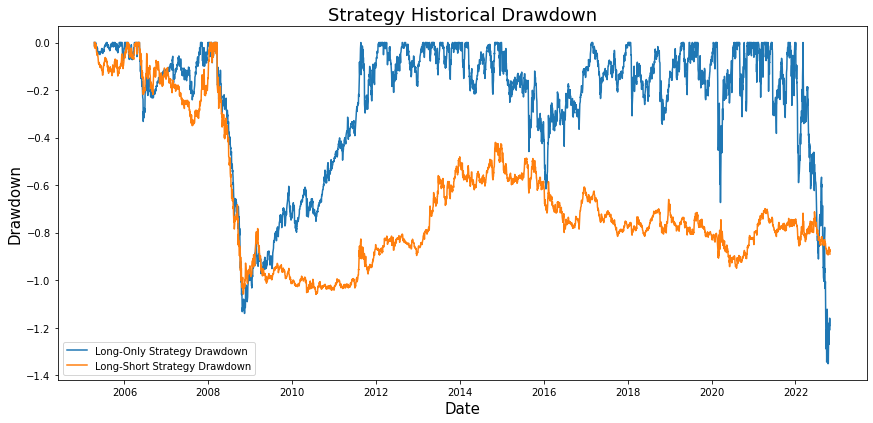

In [85]:
# Plotting
title = 'Strategy Historical Drawdown'
  
plt.figure(figsize=(14.5,6.5)) 
plt.plot(long_drawdown, label='Long-Only Strategy Drawdown')
plt.plot(long_short_drawdown,  label='Long-Short Strategy Drawdown')

plt.title(title, fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Drawdown', fontsize=15)
plt.legend(loc='lower left')
plt.show()

In [86]:
# Maximum Drawdown
long_MDD = long_drawdown.min()
long_short_MDD = long_short_drawdown.min()
long_MDD, long_short_MDD

(-1.3511404157105753, -1.0594612817653841)

In [87]:
# Caclculating Maximum Drawdown for halves of sample and the two crisis
first_half_long_running_max = np.maximum.accumulate(first_half['Long Cumulative Excess Returns'])
second_half_long_running_max = np.maximum.accumulate(second_half['Long Cumulative Excess Returns'])
great_financial_crisis_long_running_max = np.maximum.accumulate(great_financial_crisis['Long Cumulative Excess Returns'])
covid_crash_long_running_max = np.maximum.accumulate(covid_crash_crisis['Long Cumulative Excess Returns'])

first_half_long_drawdown = -(first_half_long_running_max - first_half['Long Cumulative Excess Returns'])
second_half_long_drawdown = -(second_half_long_running_max - second_half['Long Cumulative Excess Returns'])
great_financial_crisis_long_drawdown = -(great_financial_crisis_long_running_max - great_financial_crisis['Long Cumulative Excess Returns'])
covid_crash_long_drawdown = -(covid_crash_long_running_max - covid_crash_crisis['Long Cumulative Excess Returns'])

# Only care about losses
first_half_long_drawdown[first_half_long_drawdown > 0] = 0
second_half_long_drawdown[second_half_long_drawdown > 0] = 0
great_financial_crisis_long_drawdown[great_financial_crisis_long_drawdown > 0] = 0
covid_crash_long_drawdown[covid_crash_long_drawdown > 0] = 0

first_half_long_MDD = first_half_long_drawdown.min()
second_half_long_MDD = second_half_long_drawdown.min()
great_financial_crisis_long_MDD = great_financial_crisis_long_drawdown.min()
covid_crash_long_MDD = covid_crash_long_drawdown.min()

first_half_long_MDD, second_half_long_MDD, great_financial_crisis_long_MDD, covid_crash_long_MDD

(-1.1396147707882331,
 -1.3511404157105753,
 -1.1396147707882331,
 -0.6730739022283987)

**Value at Risk**

**Value at risk:** threshold with a given confidence level that, historically, the losses have not exceeded (negative return in a single day)

VaR(95) = -2.3% means that in the worst 5% days, the loss exceeded 2.3%

**Conditional Value at risk** (CVar or expected shortfall): average of losses exceeding the VaR

CVaR(95) = -2.5% means that in the worst 5% of cases, losses on average exceeded 2.5% historically

In [88]:
# Setting up the arrays
long_var_array = (strategy['Long Excess Returns'])
long_var_array_pct = long_var_array*100
long_short_var_array = (strategy['Long-Short Excess Returns'])
long_short_var_array_pct = long_short_var_array*100

# Historical Var and CVaR 90, 95 & 99
var_level = 90
long_var_90 = np.percentile(long_var_array_pct, 100-var_level)
long_cvar_90 = long_var_array_pct[long_var_array_pct <= long_var_90].mean()
long_short_var_90 = np.percentile(long_short_var_array_pct, 100-var_level)
long_short_cvar_90 = long_short_var_array_pct[long_short_var_array_pct <= long_short_var_90].mean()

var_level = 95
long_var_95 = np.percentile(long_var_array_pct, 100-var_level)
long_cvar_95 = long_var_array_pct[long_var_array_pct <= long_var_95].mean()
long_short_var_95 = np.percentile(long_short_var_array_pct, 100-var_level)
long_short_cvar_95 = long_short_var_array_pct[long_short_var_array_pct <= long_short_var_95].mean()

var_level = 99
long_var_99 = np.percentile(long_var_array_pct, 100-var_level)
long_cvar_99 = long_var_array_pct[long_var_array_pct <= long_var_99].mean()
long_short_var_99 = np.percentile(long_short_var_array_pct, 100-var_level)
long_short_cvar_99 = long_short_var_array_pct[long_short_var_array_pct <= long_short_var_99].mean()

# Sort the returns for plotting
long_sorted_rets = sorted(long_var_array_pct)
long_short_sorted_rets = sorted(long_short_var_array_pct)

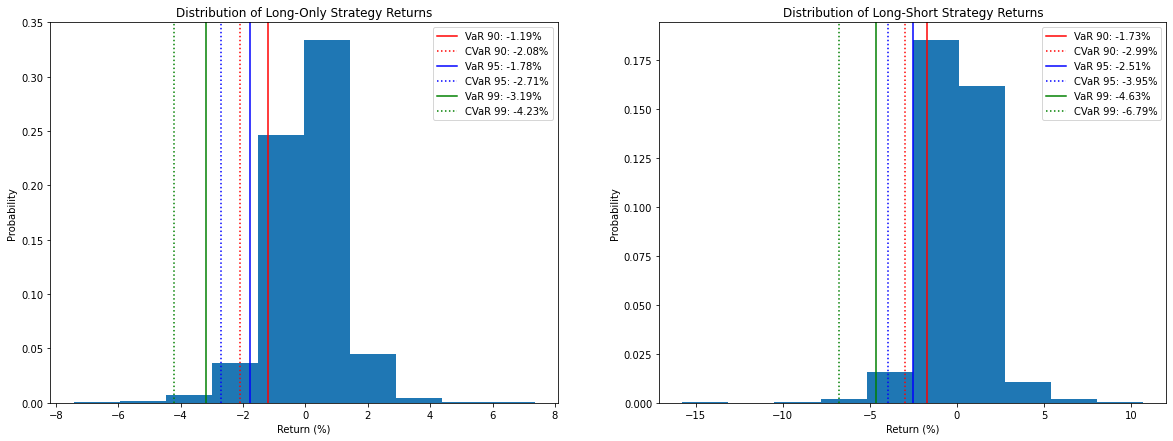

In [89]:
# Plotting
figure, axis = plt.subplots(1,2, figsize=(20,7))

axis[0].hist(long_sorted_rets, density=True)
axis[0].axvline(x=long_var_90, color="r", linestyle="-", label='VaR 90: {0:.2f}%'.format(long_var_90))
axis[0].axvline(x=long_cvar_90, color='r', linestyle=':', label='CVaR 90: {0:.2f}%'.format(long_cvar_90))
axis[0].axvline(x=long_var_95, color="b", linestyle="-", label='VaR 95: {0:.2f}%'.format(long_var_95))
axis[0].axvline(x=long_cvar_95, color='b', linestyle=':', label='CVaR 95: {0:.2f}%'.format(long_cvar_95))
axis[0].axvline(x=long_var_99, color="g", linestyle="-", label='VaR 99: {0:.2f}%'.format(long_var_99))
axis[0].axvline(x=long_cvar_99, color='g', linestyle=':', label='CVaR 99: {0:.2f}%'.format(long_cvar_99))
axis[0].set_title('Distribution of Long-Only Strategy Returns')
axis[0].set_xlabel('Return (%)')
axis[0].set_ylabel('Probability')
axis[0].legend()

axis[1].hist(long_short_sorted_rets, density=True)
axis[1].axvline(x=long_short_var_90, color="r", linestyle="-", label='VaR 90: {0:.2f}%'.format(long_short_var_90))
axis[1].axvline(x=long_short_cvar_90, color='r', linestyle=':', label='CVaR 90: {0:.2f}%'.format(long_short_cvar_90))
axis[1].axvline(x=long_short_var_95, color="b", linestyle="-", label='VaR 95: {0:.2f}%'.format(long_short_var_95))
axis[1].axvline(x=long_short_cvar_95, color='b', linestyle=':', label='CVaR 95: {0:.2f}%'.format(long_short_cvar_95))
axis[1].axvline(x=long_short_var_99, color="g", linestyle="-", label='VaR 99: {0:.2f}%'.format(long_short_var_99))
axis[1].axvline(x=long_short_cvar_99, color='g', linestyle=':', label='CVaR 99: {0:.2f}%'.format(long_short_cvar_99))
axis[1].set_title('Distribution of Long-Short Strategy Returns')
axis[1].set_xlabel('Return (%)')
axis[1].set_ylabel('Probability')
axis[1].legend()

plt.show()

In [90]:
# Creating the data
data = [['Long-Only', long_MDD, long_var_95, long_cvar_95, long_skewness, long_kurtosis], 
        ['Long-Short', long_short_MDD, long_short_var_95, long_short_cvar_95, long_short_skewness, long_short_kurtosis]]
  
# Defining header names
col_names = ['Maximum Drawdown', 'VaR 95(%)', 'CVaR 95(%)', 'Skewness', 'Kurtosis'] #será que a IR se annualiza?

print(tabulate(data, headers=col_names))

              Maximum Drawdown    VaR 95(%)    CVaR 95(%)    Skewness    Kurtosis
----------  ------------------  -----------  ------------  ----------  ----------
Long-Only             -1.35114     -1.77912      -2.70626    -0.47678     4.19137
Long-Short            -1.05946     -2.51281      -3.9502     -0.47947     8.41146


**Parametric VaR**

Using probability distribution instead of discrete historical values (doesn't address non normality of returns but allows for more flexibility when doing models)

In [91]:
long_mu = np.mean(long_var_array)
long_vol = np.std(long_var_array)
long_short_mu = np.mean(long_short_var_array)
long_short_vol = np.std(long_short_var_array)
significance_level = 0.05

# Calculate Parametric VaR
long_pvar_95 = norm.ppf(significance_level, long_mu, long_vol)
long_short_pvar_95 = norm.ppf(significance_level, long_short_mu, long_short_vol)
([long_mu, long_vol, long_pvar_95], [long_short_mu, long_short_vol, long_short_pvar_95])

([0.00037165969687136377, 0.010922429441888083, -0.0175941379857398],
 [3.9525859596284515e-06, 0.016402633493227726, -0.026975978606931704])

**Scaling Risk Estimates**

In [92]:
# Forecasting parametric VaRs
forecast_days = 5
forecast_long_pvar95_5day = long_pvar_95*np.sqrt(forecast_days)
forecast_long_short_pvar95_5day = long_short_pvar_95*np.sqrt(forecast_days)

long_forecasted_values = np.empty([100, 2])
long_short_forecasted_values = np.empty([100, 2])

for i in range(0,100):    
    long_forecasted_values[i, 0] = i
    long_short_forecasted_values[i, 0] = i
    long_forecasted_values[i, 1] = long_pvar_95*np.sqrt(i+1)
    long_short_forecasted_values[i, 1] = long_short_pvar_95*np.sqrt(i+1)

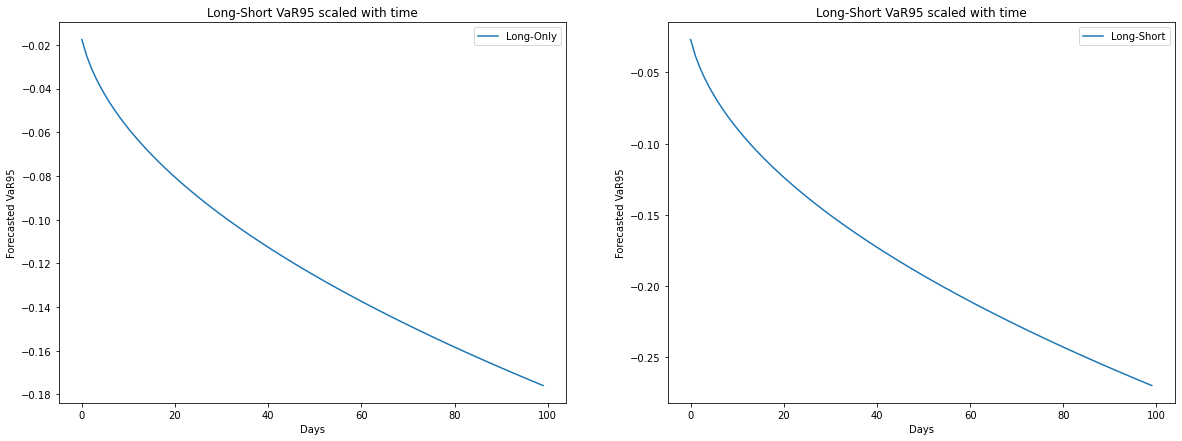

In [93]:
# Plotting
figure, axis = plt.subplots(1,2, figsize=(20,7))

axis[0].plot(long_forecasted_values[:, 0], long_forecasted_values[:, 1], label='Long-Only')
axis[0].set_title('Long-Short VaR95 scaled with time')
axis[0].set_xlabel('Days')
axis[0].set_ylabel('Forecasted VaR95')
axis[0].legend()

axis[1].plot(long_short_forecasted_values[:, 0], long_short_forecasted_values[:, 1], label='Long-Short')
axis[1].set_title('Long-Short VaR95 scaled with time')
axis[1].set_xlabel('Days')
axis[1].set_ylabel('Forecasted VaR95')
axis[1].legend()

plt.show()

**Random Walks**

Monte Carlo simulation, massive range of possible outcomes based on random walks, then analyze in the same way as historical values (with VaR for example)

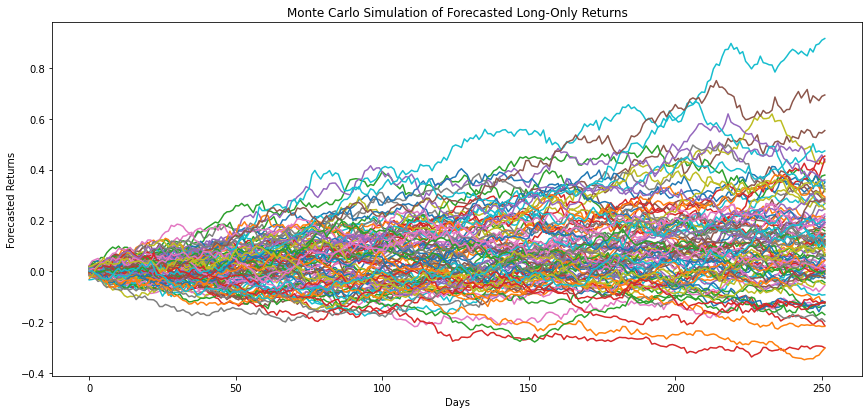

Parametric VaR(95): -1.75
Parametric VaR(99): -2.50


In [94]:
T = 252 # period
S0 = 1 # initial investment value

np.random.seed(seed=1)
sim_returns = []

plt.figure(figsize=(14.5,6.5)) 

# Loop through 100 simulations
for i in range(0,100):
    rand_rets = np.random.normal(long_mu, long_vol, T)   
    forecasted_values = S0*(rand_rets+1).cumprod()-1
    sim_returns.append(rand_rets)
    
    # Plot the Monte Carlo path
    plt.plot(range(0,T), forecasted_values)

# Show the simulations
plt.title('Monte Carlo Simulation of Forecasted Long-Only Returns')
plt.xlabel('Days'), plt.ylabel('Forecasted Returns')
plt.show()

var_95 = np.percentile(sim_returns, 5)
var_99 = np.percentile(sim_returns, 1)
print(f"Parametric VaR(95): {100*var_95:0.2f}")
print(f"Parametric VaR(99): {100*var_99:0.2f}")

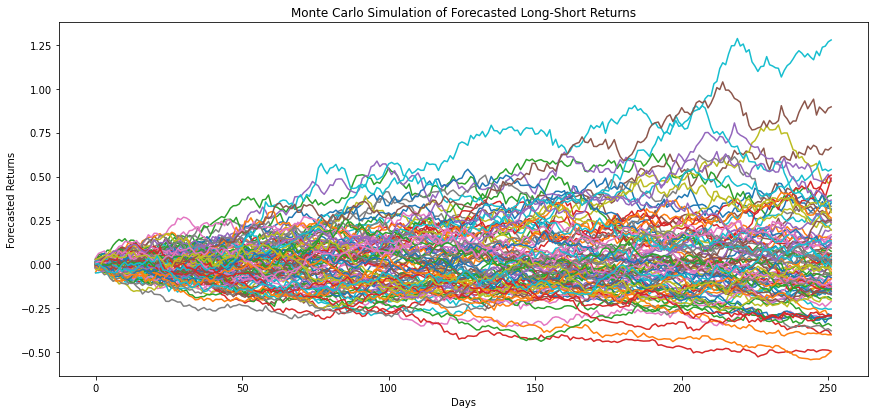

Parametric VaR(95): -2.68
Parametric VaR(99): -3.80


In [95]:
T = 252 # period
S0 = 1 # initial investment value

np.random.seed(seed=1)
sim_returns = []

plt.figure(figsize=(14.5,6.5)) 

# Loop through 100 simulations
for i in range(0,100):
    rand_rets = np.random.normal(long_short_mu, long_short_vol, T)   
    forecasted_values = S0*(rand_rets+1).cumprod()-1
    sim_returns.append(rand_rets)
    
    # Plot the Monte Carlo path
    plt.plot(range(0,T), forecasted_values)

# Show the simulations
plt.title('Monte Carlo Simulation of Forecasted Long-Short Returns')
plt.xlabel('Days'), plt.ylabel('Forecasted Returns')
plt.show()

var_95 = np.percentile(sim_returns, 5)
var_99 = np.percentile(sim_returns, 1)
print(f"Parametric VaR(95): {100*var_95:0.2f}")
print(f"Parametric VaR(99): {100*var_99:0.2f}")

# Transforming strategy returns to monthly returns (for the group part)

In [96]:
# Calculating monthly returns as the cumulative return of daily returns per month
def monthly_return_from_daily_returns(returns):
    return (returns + 1).prod() - 1

monthly_strategy_returns = strategy_returns.groupby(pd.Grouper(freq="M")).apply(monthly_return_from_daily_returns)
monthly_strategy_returns

,Long Returns,Long-Short Returns
Date,,
2005-04-30,-0.008982,-0.012721
2005-05-31,-0.039216,-0.075721
2005-06-30,0.008529,-0.032944
2005-07-31,0.043783,0.057896
2005-08-31,-0.010875,-0.025202
...,...,...
2022-06-30,-0.015660,0.065301
2022-07-31,-0.025882,-0.111632
2022-08-31,-0.043119,-0.020611


In [139]:
monthly_strategy_returns['Long Returns'].to_csv('rets_francisco.csv')